In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 50)

In [2]:
# Loading csv file.
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Checking for all null values.
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

The column company and agent have higher number of missing values.And these columns are not relevent for our analysis, so we are gonna delete them.

In [6]:
df=df.drop(['company','agent'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


The columns country and children have a small number of missing values.But they can be important factor for the analysis, so here we are just removing those rows where we have null values in these columns.  

In [7]:
df[df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [8]:
df[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [9]:
df=df.dropna(axis=0).reset_index(drop=True)

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

In [12]:
# Checking where there is no guests.
df[df.adults + df.babies + df.children == 0].shape

(170, 30)

These rows does not make any sense, so we are gonna delete these rows.

In [13]:
df = df.drop(df[(df.adults + df.babies + df.children == 0)].index).reset_index(drop=True)

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.371757,104.401312,2016.157596,27.165100,15.800965,0.928307,2.500918,1.861052,0.104356,0.007959,0.031593,0.087208,0.131612,0.218828,2.330638,102.133442,0.061915,0.571778
std,0.483276,106.915284,0.707456,13.586362,8.780412,0.992725,1.889089,0.574697,0.399439,0.097449,0.174915,0.846419,1.485300,0.638914,17.633065,50.389602,0.244230,0.792740
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


# What percentage of bookings were cancelled ?

In [16]:
booking_info=pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
booking_info

is_canceled
hotel        is_canceled             
City Hotel   0                  46082
             1                  33061
Resort Hotel 0                  28508
             1                  11077

In [17]:
booking_info.columns=['no of bookings']

In [18]:
booking_info

no of bookings
hotel        is_canceled                
City Hotel   0                     46082
             1                     33061
Resort Hotel 0                     28508
             1                     11077

In [19]:
booking_info['percentage']=df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100

In [20]:
booking_info

no of bookings  percentage
hotel        is_canceled                            
City Hotel   0                     46082   58.226249
             1                     33061   41.773751
Resort Hotel 0                     28508   72.017178
             1                     11077   27.982822

In [21]:
pd.DataFrame(booking_info)

no of bookings  percentage
hotel        is_canceled                            
City Hotel   0                     46082   58.226249
             1                     33061   41.773751
Resort Hotel 0                     28508   72.017178
             1                     11077   27.982822

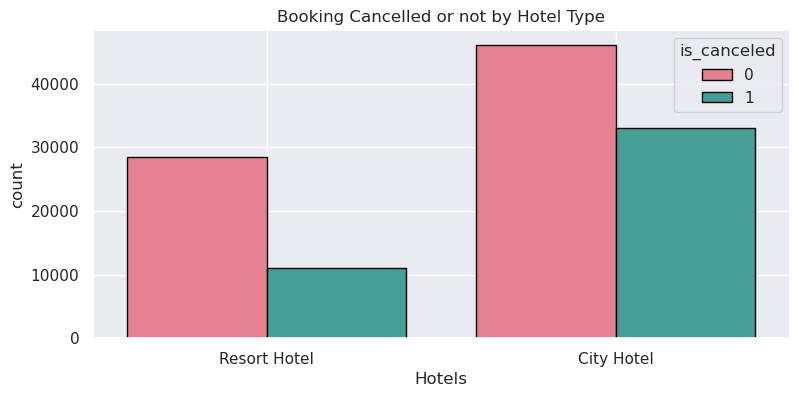

In [22]:
plt.rcParams['figure.figsize'] = (9, 4)
sns.countplot(x='hotel',data=df,hue='is_canceled',palette='husl',ec='black',lw=1).set(xlabel='Hotels')
plt.title('Booking Cancelled or not by Hotel Type')
plt.grid(True)
plt.show()

From the graph we can say that 27.98% bookings are cancelled in Resort Hotel and 41.77% bookings are cancelled in City Hotel.

# Which type of hotel has more booking ?

In [23]:
preference = pd.DataFrame(df.hotel.value_counts())

In [24]:
preference['percentage']=df.hotel.value_counts(normalize=True)*100

In [25]:
preference.index.name='hotel'

In [26]:
preference

,hotel,percentage
hotel,,
City Hotel,79143,66.659086
Resort Hotel,39585,33.340914


In [27]:
preference.rename({'hotel':'no of bookings'},axis=1,inplace=True)

In [28]:
preference

,no of bookings,percentage
hotel,,
City Hotel,79143,66.659086
Resort Hotel,39585,33.340914


In [29]:
labels=df['hotel'].value_counts().index.tolist()
labels

['City Hotel', 'Resort Hotel']

In [30]:
sizes=df['hotel'].value_counts().tolist()
sizes

[79143, 39585]

In [31]:
colors=['yellowgreen','lightcoral']
colors

['yellowgreen', 'lightcoral']

In [32]:
explode=(0,0.1)
explode

(0, 0.1)

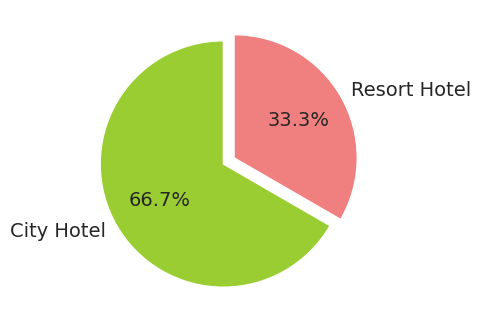

In [33]:
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",explode=explode,startangle=90,textprops={'fontsize': 14})
plt.show()

As we can see that, booking perentage of City Hotel is higher than that of Resort Hotel.

# Which month has the highest number of arrivals ?

In [34]:
confirmed_booking=df.loc[df.is_canceled==0]
confirmed_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
confirmed_booking.reset_index(drop=True,inplace=True)

In [36]:
confirmed_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [37]:
people_arrival_count_df=pd.DataFrame(confirmed_booking['arrival_date_month'].value_counts())
people_arrival_count_df.head()

,arrival_date_month
August,8604
July,7880
May,7091
October,6854
March,6566


In [38]:
people_arrival_count_df.columns=['No of bookings']

In [39]:
people_arrival_count_df.head()

,No of bookings
August,8604
July,7880
May,7091
October,6854
March,6566


In [40]:
people_arrival_count_df.index.name='arrival_date_month'

In [41]:
people_arrival_count_df.head()

,No of bookings
arrival_date_month,
August,8604
July,7880
May,7091
October,6854
March,6566


In [42]:
people_arrival_count_df['booking_percentage'] =confirmed_booking['arrival_date_month'].value_counts(normalize=True)*100

In [43]:
people_arrival_count_df

,No of bookings,booking_percentage
arrival_date_month,,
August,8604,11.535058
July,7880,10.564419
May,7091,9.506636
October,6854,9.188899
March,6566,8.802789
April,6528,8.751843
June,6384,8.558788
September,6360,8.526612
February,5304,7.110873


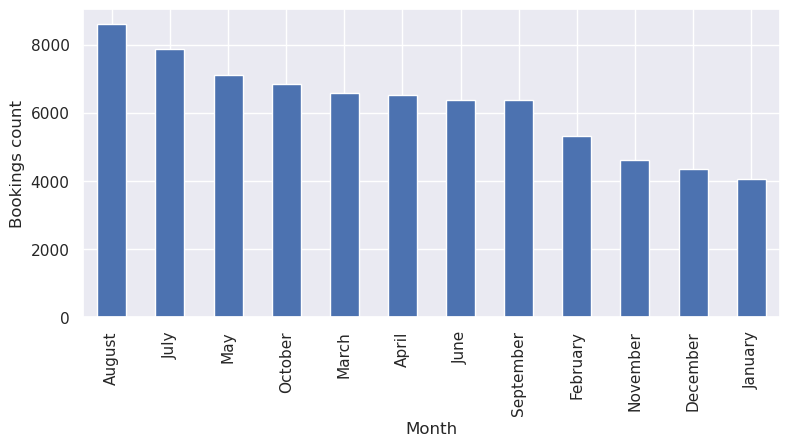

In [44]:
confirmed_booking['arrival_date_month'].value_counts().plot(kind='bar').set(xlabel=('Month'),ylabel=('Bookings count'))
plt.show()

From the above we see that, August has the highest number of arrivals and January has the lowest number of arrivals.

# Which year has highest number of arrivals ?

In [45]:
yearly_bookings=pd.DataFrame(confirmed_booking.groupby('arrival_date_year')['hotel'].value_counts())
yearly_bookings

hotel
arrival_date_year hotel              
2015              City Hotel     7654
                  Resort Hotel   6071
2016              City Hotel    22662
                  Resort Hotel  13389
2017              City Hotel    15766
                  Resort Hotel   9048

In [46]:
yearly_bookings.columns=['No of bookings']

In [47]:
yearly_bookings

No of bookings
arrival_date_year hotel                       
2015              City Hotel              7654
                  Resort Hotel            6071
2016              City Hotel             22662
                  Resort Hotel           13389
2017              City Hotel             15766
                  Resort Hotel            9048

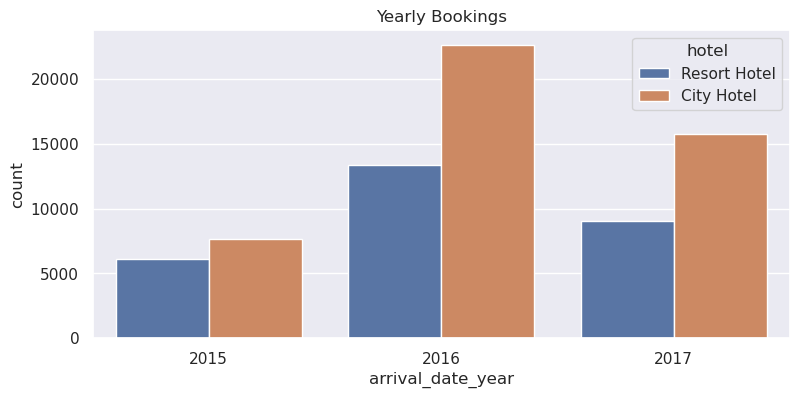

In [48]:
sns.countplot(x='arrival_date_year',data=confirmed_booking,hue='hotel').set_title('Yearly Bookings')
plt.show()

From the above we see that, most number of people arrived in year 2016.

# From which country people are comming the most ? 

In [49]:
# Top 10 countries people are comming the most in number.
country=pd.DataFrame(confirmed_booking.country.value_counts())
country

,country
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
BHR,1
DJI,1
MLI,1
NPL,1


In [50]:
country.columns=['no of bookings']

In [51]:
country

,no of bookings
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
BHR,1
DJI,1
MLI,1
NPL,1


In [52]:
y=list(confirmed_booking.country.value_counts().head(10))
y

[20977, 9668, 8468, 6383, 6067, 2542, 2428, 1868, 1716, 1592]

In [53]:
x=list(confirmed_booking.country.value_counts().head(10).keys())
x

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD', 'USA']

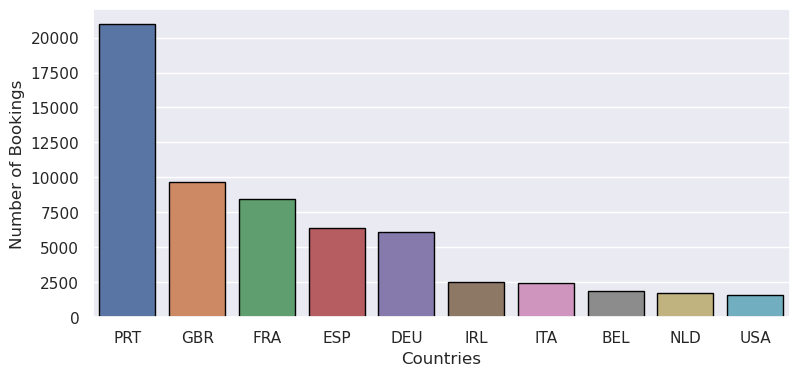

In [54]:
sns.barplot(x=list(confirmed_booking.country.value_counts().head(10).keys()),y=list(confirmed_booking.country.value_counts().head(10)),ec='black',lw=1)
plt.xlabel('Countries')
plt.ylabel('Number of Bookings')
plt.show()

From the above we see that, Portugal has the highest number of arrivals.

# Market Segment wise bookings

In [55]:
market_df=pd.DataFrame(confirmed_booking.market_segment.value_counts())
market_df

,market_segment
Online TA,35599
Offline TA/TO,15854
Direct,10504
Groups,7692
Corporate,4121
Complementary,637
Aviation,183


In [56]:
market_df.index.name='market_segment'

In [57]:
market_df

,market_segment
market_segment,
Online TA,35599
Offline TA/TO,15854
Direct,10504
Groups,7692
Corporate,4121
Complementary,637
Aviation,183


In [58]:
market_df.columns=['no of bookings']

In [59]:
market_df

,no of bookings
market_segment,
Online TA,35599
Offline TA/TO,15854
Direct,10504
Groups,7692
Corporate,4121
Complementary,637
Aviation,183


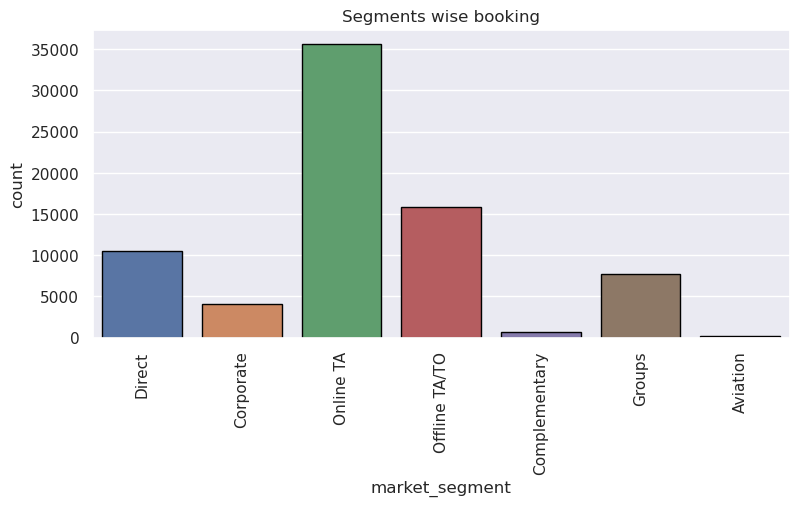

In [60]:
sns.countplot(x='market_segment',data=confirmed_booking,ec='black',lw=1)
plt.title("Segments wise booking")
plt.xticks(rotation=90)
plt.show()

From the above we see that, Online TA is the most frequent maket segment.

# Prices per month

In [61]:
df['adr_pp'] = df['adr'] / df['adults'] + df['children']

In [62]:
df['adr_pp']

0          0.000000
1          0.000000
2         75.000000
3         75.000000
4         49.000000
            ...    
118723    48.070000
118724    75.143333
118725    78.855000
118726    52.200000
118727    75.600000
Name: adr_pp, Length: 118728, dtype: float64

In [63]:
actual_guests=df.loc[df['is_canceled']==0]
actual_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118723,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
118724,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
118725,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
118726,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [64]:
actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']

0         0
1         0
2         1
3         1
4         2
         ..
118723    7
118724    7
118725    7
118726    7
118727    9
Length: 74590, dtype: int64

In [65]:
pd.options.mode.chained_assignment=None

In [66]:
actual_guests['price']=actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

In [67]:
actual_guests['price']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
118723     672.98
118724    1578.01
118725    1103.97
118726     730.80
118727    1360.80
Name: price, Length: 74590, dtype: float64

In [68]:
actual_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118723,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,672.98
118724,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,1578.01
118725,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,1103.97
118726,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,730.80


In [69]:
actual_guests['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
118723    August
118724    August
118725    August
118726    August
118727    August
Name: arrival_date_month, Length: 74590, dtype: object

In [70]:
actual_guests['price']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
118723     672.98
118724    1578.01
118725    1103.97
118726     730.80
118727    1360.80
Name: price, Length: 74590, dtype: float64

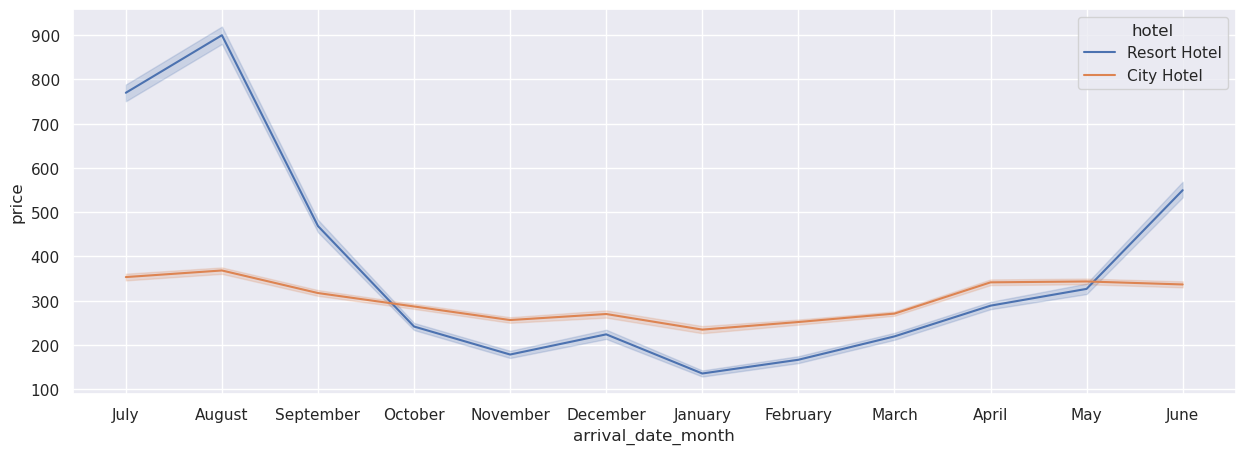

In [71]:
plt.figure(figsize=(15,5))
sns.lineplot(data=actual_guests,x='arrival_date_month',y='price',hue='hotel')
plt.show()

From the above we see that, Resort Hotel prices are higher and fluctuate than City Hotel.

The prices of Resost Hotel are extremely high during June, July and August.

The price of City Hotel are highest in August.

# How many nights mostly the guests stay in the hotel ?

In [72]:
stay=(actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']).value_counts(normalize=True)*100
stay

3     21.024266
1     20.811101
2     20.599276
4     14.741923
7      7.602896
5      6.834696
6      3.095589
10     1.039013
8      0.951870
14     0.875452
0      0.827189
9      0.702507
11     0.366001
12     0.163561
13     0.117978
15     0.048264
21     0.048264
28     0.029495
16     0.024132
17     0.020110
25     0.018769
22     0.012066
18     0.008044
19     0.008044
35     0.006703
42     0.004022
30     0.002681
23     0.002681
29     0.002681
46     0.001341
45     0.001341
56     0.001341
38     0.001341
20     0.001341
48     0.001341
24     0.001341
34     0.001341
dtype: float64

In [73]:
list(stay.head(10))

[21.024265987397776,
 20.811100683737767,
 20.599276042364927,
 14.741922509719801,
 7.6028958305402865,
 6.8346963399919565,
 3.0955892210752114,
 1.039013272556643,
 0.951870223890602,
 0.8754524735219198]

In [74]:
list(stay.head(10).keys())

[3, 1, 2, 4, 7, 5, 6, 10, 8, 14]

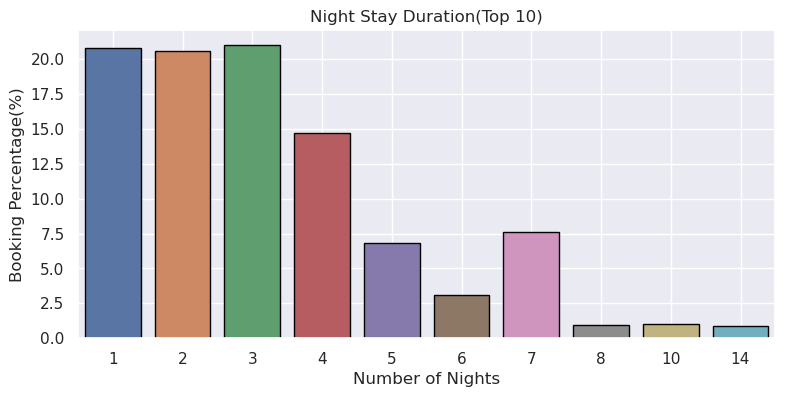

In [75]:
sns.barplot(y=list(stay.head(10)),x=list(stay.head(10).keys()),ec='black',lw=1)
plt.xlabel('Number of Nights')
plt.ylabel('Booking Percentage(%)')
plt.title('Night Stay Duration(Top 10)')
plt.grid(True)
plt.show()

Most of the guests stay for 1,2 and 3 nights.More than 60% of guests come under these three options.

# What is the optimal length of stay in order to get the best daily rate ?

In [76]:
actual_guests['total_stay']=actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']
actual_guests['total_stay']

0         0
1         0
2         1
3         1
4         2
         ..
118723    7
118724    7
118725    7
118726    7
118727    9
Name: total_stay, Length: 74590, dtype: int64

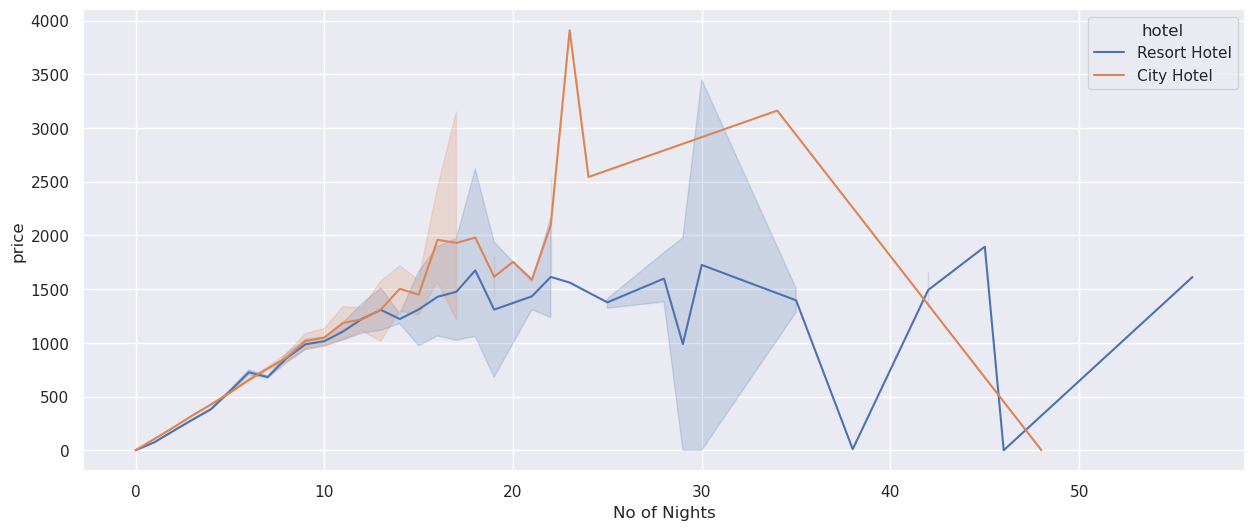

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(data=actual_guests,x='total_stay',y='price',hue='hotel').set(xlabel='No of Nights')
plt.show()

To get the best price, the optimal length of stay should be less than 5 days.

# Which is the most reserved room type ?

In [78]:
room_type=pd.DataFrame(df.reserved_room_type.value_counts(normalize=True)*100)
room_type

,reserved_room_type
A,71.996496
D,16.130146
E,5.458696
F,2.431608
G,1.752746
B,0.935752
C,0.783303
H,0.506199
L,0.005054


In [79]:
room_type.columns=['booking percentage']

In [80]:
room_type

,booking percentage
A,71.996496
D,16.130146
E,5.458696
F,2.431608
G,1.752746
B,0.935752
C,0.783303
H,0.506199
L,0.005054


In [81]:
room_type.index.name='room type'

In [82]:
room_type

,booking percentage
room type,
A,71.996496
D,16.130146
E,5.458696
F,2.431608
G,1.752746
B,0.935752
C,0.783303
H,0.506199
L,0.005054


In [83]:
list(room_type['booking percentage'])

[71.99649619297891,
 16.130146216562228,
 5.458695505693687,
 2.431608382184489,
 1.7527457718482582,
 0.9357523077959706,
 0.78330301192642,
 0.5061990431911596,
 0.005053567818880129]

In [84]:
list(room_type.index)

['A', 'D', 'E', 'F', 'G', 'B', 'C', 'H', 'L']

[Text(0.5, 0, 'Room Type'), Text(0, 0.5, 'Booking Percentage (%)')]

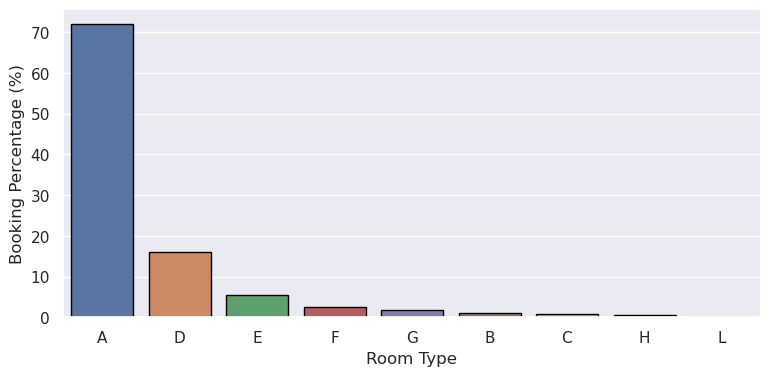

In [85]:
sns.barplot(y=list(room_type['booking percentage']),x=list(room_type.index),ec='black',lw=1).set(xlabel='Room Type',ylabel='Booking Percentage (%)')

From the above we see that, 71.99% of the guests are booking room type "A".

# What is the most common customer type ?

In [86]:
customer_type=pd.DataFrame(df.customer_type.value_counts(normalize=True)*100)
customer_type

,customer_type
Transient,75.000000
Transient-Party,21.091908
Contract,3.429688
Group,0.478404


In [87]:
customer_type.columns=['booking percentage']

In [88]:
customer_type

,booking percentage
Transient,75.000000
Transient-Party,21.091908
Contract,3.429688
Group,0.478404


In [89]:
customer_type.index.name='customer type'

In [90]:
customer_type

,booking percentage
customer type,
Transient,75.000000
Transient-Party,21.091908
Contract,3.429688
Group,0.478404


In [91]:
list(customer_type['booking percentage'])

[75.0, 21.091907553399366, 3.4296880264133147, 0.47840442018731894]

In [92]:
list(customer_type.index)

['Transient', 'Transient-Party', 'Contract', 'Group']

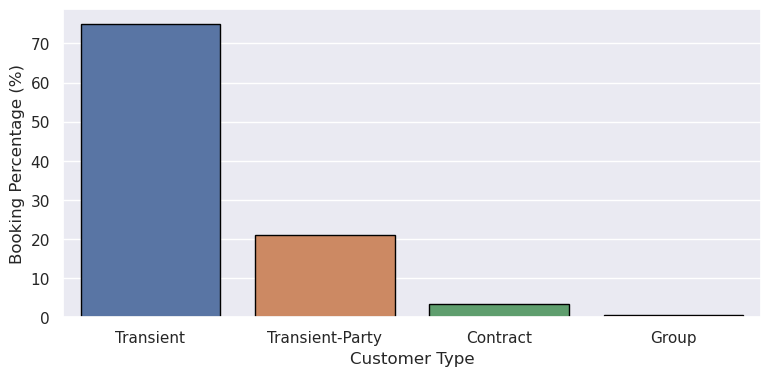

In [93]:
sns.barplot(y=list(customer_type['booking percentage']),x=list(customer_type.index),ec='black',lw=1).set(xlabel='Customer Type',ylabel='Booking Percentage (%)')
plt.show()

From the above we see that 70% guests are Transient customer.

# What is the most popular meal package ?

In [94]:
meal=pd.DataFrame(df.meal.value_counts(normalize=True)*100)
meal

,meal
BB,77.310323
HB,12.152988
SC,8.883330
Undefined,0.981234
FB,0.672125


In [95]:
meal.columns=['percentage']

In [96]:
meal

,percentage
BB,77.310323
HB,12.152988
SC,8.883330
Undefined,0.981234
FB,0.672125


In [97]:
meal.index.name='meal_type'

In [98]:
meal

,percentage
meal_type,
BB,77.310323
HB,12.152988
SC,8.883330
Undefined,0.981234
FB,0.672125


In [99]:
list(meal.index)

['BB', 'HB', 'SC', 'Undefined', 'FB']

In [100]:
list(meal.percentage)

[77.31032275453137,
 12.152988343103564,
 8.883329964288121,
 0.9812344181658917,
 0.6721245199110573]

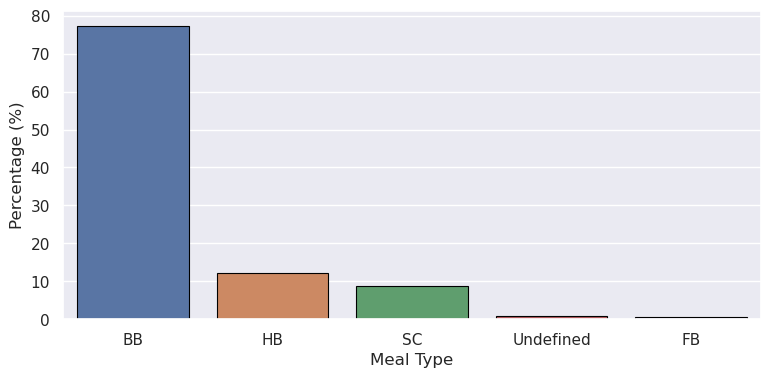

In [101]:
sns.barplot(x=list(meal.index),y=list(meal.percentage),ec='black',lw=0.8).set(xlabel='Meal Type',ylabel='Percentage (%)')
plt.show()

From the above we see that, 77.3% guests preferred BB as their meal while staying at hotel.

# Number of special requests

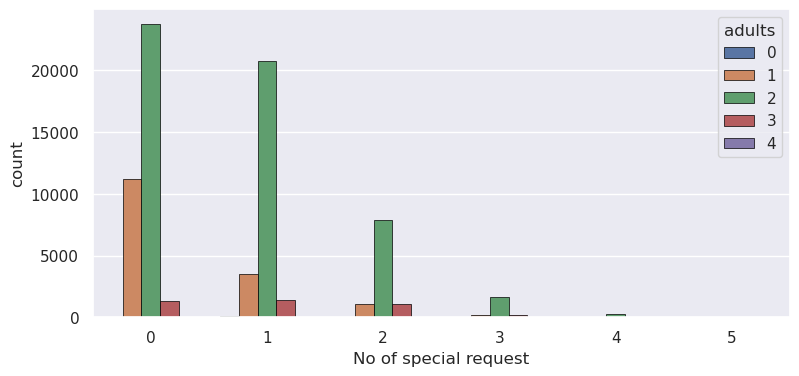

In [102]:
sns.countplot(data=actual_guests,x='total_of_special_requests',hue='adults',ec='black',lw=0.5).set(xlabel='No of special request')
plt.show()

In [103]:
actual_guests['kids']=actual_guests['babies'] + actual_guests['children']
actual_guests['kids']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
118723    0.0
118724    0.0
118725    0.0
118726    0.0
118727    0.0
Name: kids, Length: 74590, dtype: float64

In [104]:
actual_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,price,total_stay,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.00,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.00,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.00,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.00,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,196.00,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118723,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,672.98,7,0.0
118724,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,1578.01,7,0.0
118725,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,1103.97,7,0.0
118726,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,730.80,7,0.0


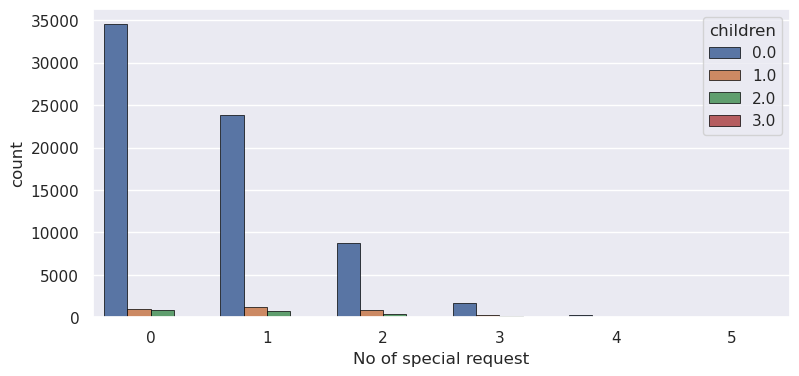

In [105]:
sns.countplot(data=actual_guests,x='total_of_special_requests',hue='children',ec='black',lw=0.5).set(xlabel='No of special request')
plt.show()

# What is the relationship between lead time and cancellation ?

In [106]:
bins=np.arange(0,250,10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

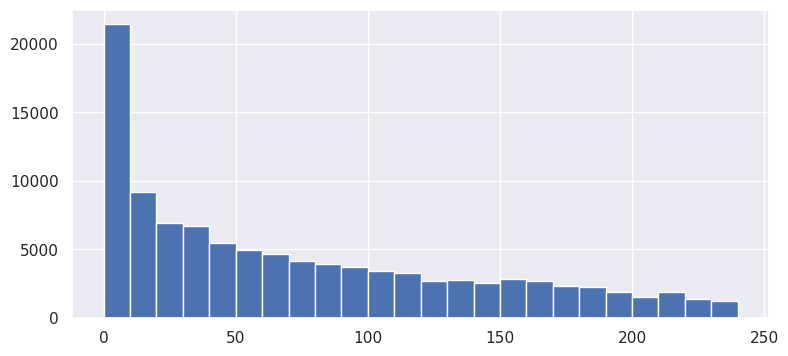

In [107]:
plt.hist(df.lead_time,bins)
plt.show()

In [108]:
a=df.groupby('lead_time')['is_canceled'].describe()
a.head()

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6152.0,0.067133,0.250272,0.0,0.0,0.0,0.0,1.0
1,3378.0,0.092954,0.290412,0.0,0.0,0.0,0.0,1.0
2,2029.0,0.103499,0.304685,0.0,0.0,0.0,0.0,1.0
3,1801.0,0.100500,0.300749,0.0,0.0,0.0,0.0,1.0
4,1691.0,0.101715,0.302363,0.0,0.0,0.0,0.0,1.0


In [109]:
a.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            594, 601, 605, 608, 615, 622, 626, 629, 709, 737],
           dtype='int64', name='lead_time', length=479)

In [110]:
a['mean']*100

lead_time
0        6.713264
1        9.295441
2       10.349926
3       10.049972
4       10.171496
          ...    
622    100.000000
626    100.000000
629    100.000000
709      0.000000
737      0.000000
Name: mean, Length: 479, dtype: float64

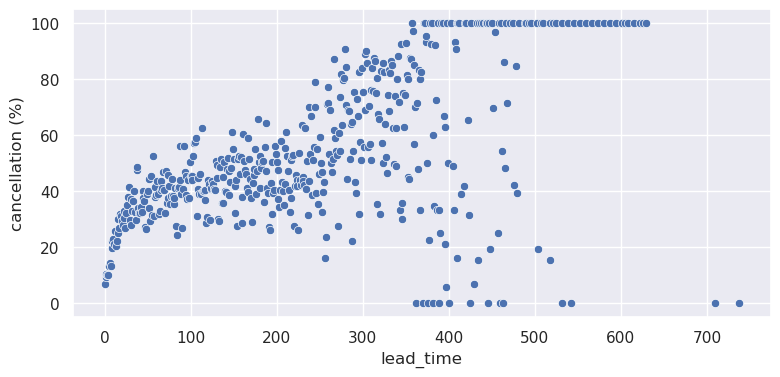

In [111]:
sns.scatterplot(x=a.index,y=a['mean']*100).set(ylabel='cancellation (%)')
plt.grid(True)
plt.show()

From the above we see that, lead time has a positive correlation with cancellation. It means that higher the lead time, higher the chances of cancellation of booking.

# What is the relationship between deposit type and cancellation ?

In [112]:
dep = pd.DataFrame(df.groupby('deposit_type')['is_canceled'].value_counts())
dep['cancellation percentage'] = df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True)*100
dep.columns = ['cancellation count','cancellation percentage']
dep

cancellation count  cancellation percentage
deposit_type is_canceled                                             
No Deposit   0                         74371                71.515390
             1                         29622                28.484610
Non Refund   1                         14480                99.361834
             0                            93                 0.638166
Refundable   0                           126                77.777778
             1                            36                22.222222

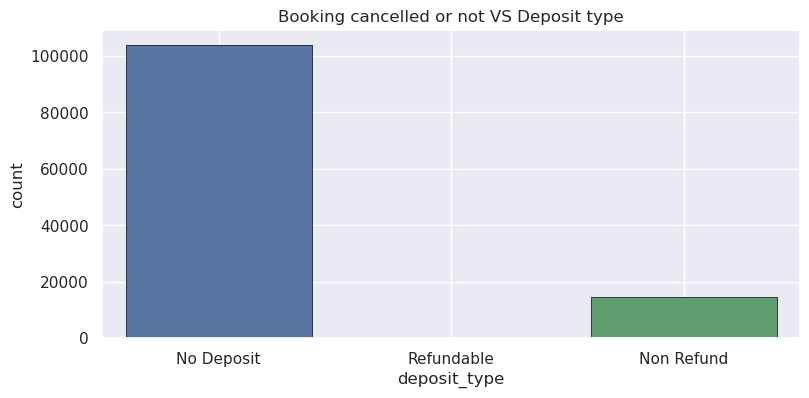

In [113]:
plt.title('Booking cancelled or not VS Deposit type')
sns.countplot(x='deposit_type',data=df,ec='black',lw=0.5)
plt.grid(True)
plt.show()

From the above we see that, 28.48% of booking were cancelled by the guests if there is no deposit.

It is also interesting that, if the fees is non refund then it has more percenatge of cancellation then that of refundable.

# CONCLUSION

* Majority of the hotels are City Hotel, so we have to spend more money on these types of hotels.

* Most number of bookings occured in summer months, so we have to target these summer months to increase the hotel business.

* Most of the guests are from western nations, so we have to spent more time and money on those nations so that the hotel business will grow more on those nations.

* Most of the guests are Transient, so we can target these types of guests to increase the number of booking.